The objective of this lab is to compare the alignment of the `mixed_reads` files with the human reference genome against that of the S. oneidensis reference genome. We will also generate a coverage plot based on the `SAM` output file generated using `Bowtie2`. `SAMtools` will be helpful for working with the `SAM` files.

From the analysis below we have learned that $510685$ reads map to humans, $1326425$ reads map to S. oneidensis, and the reads do not cover the S. oneidensis genome uniformly, as evidenced by the non-uniform distribution of depth of coverage.

The terminal commands below copy the data files into the local `Lab 6` directory for convenient access.

`[5450915@ip-172-30-0-105 Lab6_data]$ cp * ~/Lab\ 6`

`[5450915@ip-172-30-0-105 hg19]$ cp * ~/Lab\ 6`

`[5450915@ip-172-30-0-105 shewanella_oneidensis_mr-1]$ cp * ~/Lab\ 6`

## Alignment with human genome

This `bowtie2` command runs the program for the `mixed_reads` input reads and against the `hg19` database. It outputs to `hg19_output.sam` with the unaligned reads written into `hg19_unaligned.fastq`. That is, the reads in `hg19_unaligned.fastq` do not align with the human genome.

`[5450915@ip-172-30-0-105 hg19]$ bowtie2 -p 16 --very-fast --no-unal -x hg19 -U ../mixed_reads1.fastq,../mixed_reads2.fastq -S hg19_output.sam --un hg19_unaligned.fastq
2570882 reads; of these:
  2570882 (100.00%) were unpaired; of these:
    2060197 (80.14%) aligned 0 times
    468483 (18.22%) aligned exactly 1 time
    42202 (1.64%) aligned >1 times
19.86% overall alignment rate`

The output shows that $19.86\text{%}$ of the sequencing library came from contaminated human DNA.

## Alignment with S. oneidensis genome

This `bowtie2` command runs the program for the `hg19_unaligned.fastq` filtered input reads and the `shewanella_oneidensis_mr-1` database. That is, we used pass the reads that do not align with the human genome into `bowtie2` as the new input. It outputs to `shewanella_oneidensis_mr-1_output.sam` with the unaligned reads written into `shewanella_oneidensis_mr-1_unaligned.fastq`. 

`[5450915@ip-172-30-0-105 shewanella_oneidensis_mr-1]$ bowtie2 -p 16 --very-fast --no-unal -x shewanella_oneidensis_mr-1 -U ../hg19/hg19_unaligned.fastq -S shewanella_oneidensis_mr-1_output.sam --un shewanella_oneidensis_mr-1_unaligned.fastq 
2060197 reads; of these:
  2060197 (100.00%) were unpaired; of these:
    733772 (35.62%) aligned 0 times
    1238875 (60.13%) aligned exactly 1 time
    87550 (4.25%) aligned >1 times
64.38% overall alignment rate`

The output shows that  $35.62\text{%}$ of the filtered library did not align with the reference genome.

Below is an identical `bowtie2` command with the exception of the `--very-fast` parameter being changed to the `--very-sensitive` parameter. The results are similar; however, the percentage of reads that did not align has decreased from $35.62\text{%}$ to $35.37\text{%}$, which is to be expected.

`[5450915@ip-172-30-0-105 shewanella_oneidensis_mr-1]$ bowtie2 -p 16 --very-sensitive --no-unal -x shewanella_oneidensis_mr-1 -U ../hg19/hg19_unaligned.fastq -S shewanella_oneidensis_mr-1_output.sam --un shewanella_oneidensis_mr-1_unaligned.fastq
2060197 reads; of these:
  2060197 (100.00%) were unpaired; of these:
    728613 (35.37%) aligned 0 times
    1242169 (60.29%) aligned exactly 1 time
    89415 (4.34%) aligned >1 times
64.63% overall alignment rate`

## Coverage plot

The following command uses `SAMtools` to generate a `.bam` file named `shewanella_oneidensis_mr-1_output.bam` from `shewanella_oneidensis_mr-1_output.sam`.

`[5450915@ip-172-30-0-105 shewanella_oneidensis_mr-1]$ samtools view -b shewanella_oneidensis_mr-1_output.sam > shewanella_oneidensis_mr-1_output.bam`

Next, we sort `shewanella_oneidensis_mr-1_output.bam` and output to `shewanella_oneidensis_mr-1_output_sorted.bam`.

`[5450915@ip-172-30-0-105 shewanella_oneidensis_mr-1]$ samtools sort shewanella_oneidensis_mr-1_output.bam > shewanella_oneidensis_mr-1_output.sorted.bam`

Next, we index `shewanella_oneidensis_mr-1_output.sorted.bam`.

`[5450915@ip-172-30-0-105 shewanella_oneidensis_mr-1]$ samtools index shewanella_oneidensis_mr-1_output.sorted.bam`

Finally, we generate a list of coordinates and the number of reads aligned at each position in `coverage.tab`.

`[5450915@ip-172-30-0-105 shewanella_oneidensis_mr-1]$ samtools depth –a shewanella_oneidensis_mr-1_output.sorted.bam > coverage.tab`

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
somr1depths = []
somr1plasmid_depths = []
coverage_file = open("shewanella_oneidensis_mr-1/coverage.tab", "r")
for line in coverage_file:
    entries = line.split()
    # Differentiate between Shewanella oneidensis MR-1, complete genome (AE014299.2) and Shewanella oneidensis MR-1 megaplasmid, complete sequence (AE014300.1)
    if entries[0] == "AE014299.2":
        somr1depths.append(int(entries[2]))
    else:
        somr1plasmid_depths.append(int(entries[2]))
coverage_file.close()

As stated in the code block above, it turns out that the data provided covers Shewanella oneidensis MR-1, complete genome (AE014299.2) and Shewanella oneidensis MR-1 megaplasmid, complete sequence (AE014300.1). We plot them separately to differentiate between them.

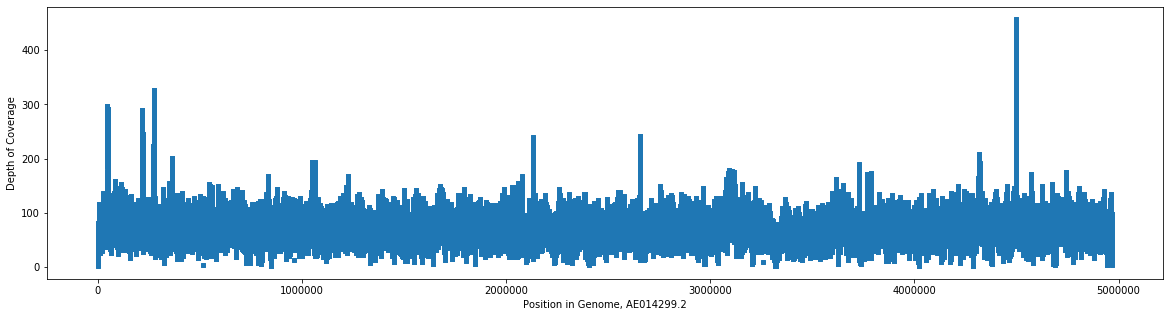

In [3]:
plt.rcParams['figure.figsize'] = 20, 5
plt.xlabel("Position in Genome, AE014299.2")
plt.ylabel("Depth of Coverage")
plt.scatter(range(len(somr1depths)), somr1depths, s=10, marker="s")
plt.show()

The plot of the genome AE014299.2 is not completely uniform, as evidenced by the various spikes at various positions in the genome where the depth is significantly higher than the average.

In [4]:
print("For AE014299.2, the min coverage is {}, the max coverage is {}, and the mean coverage is {}.".format(min(somr1depths), max(somr1depths), sum(somr1depths)/len(somr1depths)))

For AE014299.2, the min coverage is 1, the max coverage is 457, and the mean coverage is 69.12594684184167.


For clarity, the plasmid AE014300.1 is also plotted below.

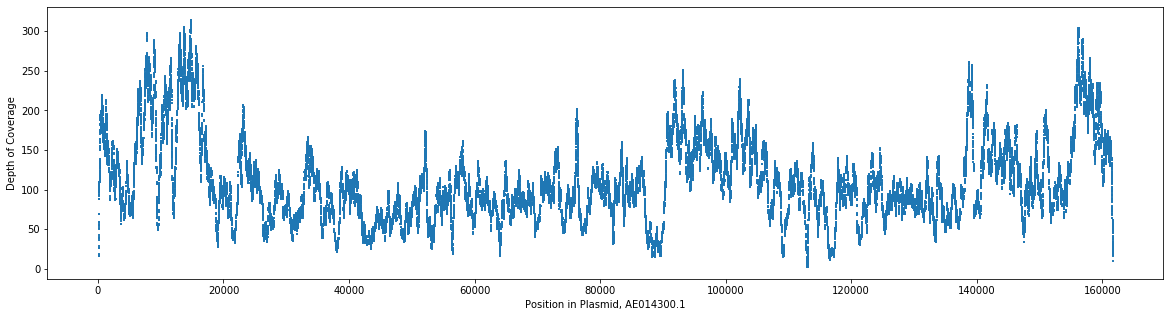

In [5]:
plt.rcParams['figure.figsize'] = 20, 5
plt.xlabel("Position in Plasmid, AE014300.1")
plt.ylabel("Depth of Coverage")
plt.scatter(range(len(somr1plasmid_depths)), somr1plasmid_depths, s=1, marker="s")
plt.show()

In [6]:
print("For AE014300.1, the min coverage is {}, the max coverage is {}, and the mean coverage is {}.".format(min(somr1plasmid_depths), max(somr1plasmid_depths), sum(somr1plasmid_depths)/len(somr1plasmid_depths)))

For AE014300.1, the min coverage is 3, the max coverage is 315, and the mean coverage is 110.94984933142754.


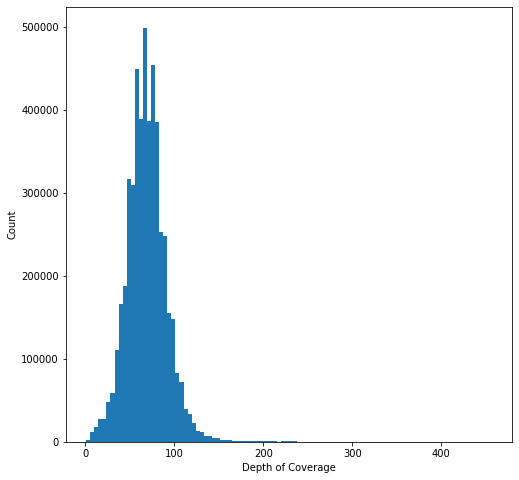

In [7]:
plt.rcParams['figure.figsize'] = 8, 8
plt.xlabel("Depth of Coverage")
plt.ylabel("Count")
hist = plt.hist(somr1depths, bins=100)
plt.show()

The plot appears to be right skewed, with peak around approximately $80$ depth of coverage and a very thin tail extending to about $270$ depth of coverage. Of course, the maximum coverage is still $457$. This would suggest that lower coverage is generally more common than higher coverage. The majority (in terms of mass) of the distribution is concentrated from about $20$ to $100$ depth of coverage.

## Extra Credit 1

The workflow is nearly identical to the previous part.

`[5450915@ip-172-30-0-105 hg19]$ samtools view -b hg19_output.sam > hg19_output.bam`

`[5450915@ip-172-30-0-105 hg19]$ samtools sort hg19_output.bam > hg19_output.sorted.bam`

`[5450915@ip-172-30-0-105 hg19]$ samtools index hg19_output.sorted.bam`

`[5450915@ip-172-30-0-105 hg19]$ samtools depth -a hg19_output.sorted.bam > coverage.tab`


In [8]:
hg19depths = {"chr1":[], "chr2":[], "chr3":[], "chr4":[], "chr5":[], "chr6":[], "chr7":[], "chr8":[], "chr9":[], "chr10":[], "chr11":[], "chr12":[], "chr13":[], "chr14":[], "chr15":[], "chr16":[], "chr17":[], "chr18":[], "chr19":[], "chr20":[], "chr21":[], "chr22":[], "chrX":[], "chrY":[]}
chromosomes = hg19depths.keys()
coverage_file = open("hg19/hg19_output.sam", "r")
for line in coverage_file:
    entries = line.split()
    refseq = entries[2]
    if not "@" in entries[0] and refseq in chromosomes:
        seq = entries[9]
        hg19depths[refseq].append(len(seq))
coverage_file.close()

In [9]:
average_depths = []
index = 0
for reads in hg19depths.values():
    average_depths.append(sum(reads)/len(reads))

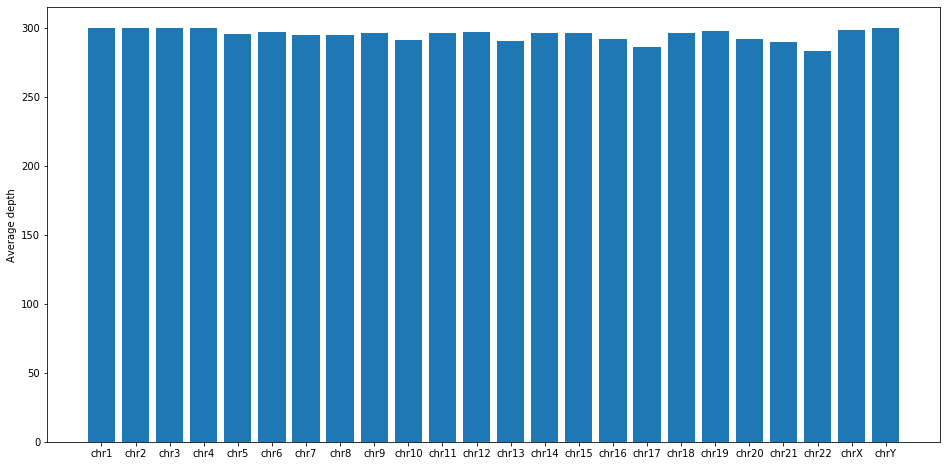

In [10]:
plt.rcParams['figure.figsize'] = 16, 8
plt.ylabel("Average depth")
plt.bar(list(chromosomes), average_depths)
plt.show()

Chromsomes X and Y have relatively high average depth; therefore, Jamie is biologically male.

## Extra Credit 2

Outliers were determined based on select regions in the coverage plots.

We will try to look at the regions with higher coverage than average based on the coverage plot for the S. oneidensis reference genome AE014299.2. In particular, we want to look at the regions around positions $100000$, $2650000$, and $5000000$.

In [11]:
def getOutlierRange(start, end, threshold):
    outlier_range = []
    for i in range(start, end):
        coverage = somr1depths[i]
        isOutlier = coverage > threshold
        if isOutlier:
            outlier_range.append(i)
    return (min(outlier_range), max(outlier_range))

outlier_range = getOutlierRange(0, 200000, 180)
print("For first outlier, search between positions " + str(outlier_range[0]) + "-" + str(outlier_range[1]))

outlier_range = getOutlierRange(2000000, 2300000, 160)
print("For second outlier, search between positions " + str(outlier_range[0]) + "-" + str(outlier_range[1]))

outlier_range = getOutlierRange(4400000, 4600000, 200)
print("For third outlier, search between positions " + str(min(outlier_range)) + "-" + str(max(outlier_range)))

For first outlier, search between positions 46770-50703
For second outlier, search between positions 2078896-2132905
For third outlier, search between positions 4497430-4499215


Now, we check a annotated genome of Shewanella oneidensis MR-1 at the specified positions to see what genes are encoded in the regions.

*Data collected from http://bacteria.ensembl.org/Shewanella_oneidensis_mr_1/Location/View?db=core;g=SO_4583;r=Chromosome:46770-50703;t=AAN57543*

The first outlier range contains the genes rrsA (SO_r001) and rrlA (SO_r002). They are protein coding genes.

*Data collected from http://bacteria.ensembl.org/Shewanella_oneidensis_mr_1/Location/View?db=core;g=SO_4583;r=Chromosome:2093199-2147208;t=AAN57543*

The second outlier range contains the genes tnpA (SO_2035) int_ISSod25 (SO_2036). They are protein coding genes.

*Data collected from http://bacteria.ensembl.org/Shewanella_oneidensis_mr_1/Location/View?db=core;g=SO_4583;r=Chromosome:4490000-4500000;t=AAN57543*

The third outlier range contains the gene bpfA (SO_4317). It is a protein coding gene.

Now, we will repeat the process for the S. oneidensis plasmid, checking regions near positions $15000$, $140000$, and $160000$.

In [12]:
def getOutlierRange(start, end, threshold):
    outlier_range = []
    for i in range(start, end):
        coverage = somr1plasmid_depths[i]
        isOutlier = coverage > threshold
        if isOutlier:
            outlier_range.append(i)
    return (min(outlier_range), max(outlier_range))

outlier_range = getOutlierRange(10000, 20000, 300)
print("For first outlier, search between positions " + str(outlier_range[0]) + "-" + str(outlier_range[1]))

outlier_range = getOutlierRange(137000, 143000, 240)
print("For second outlier, search between positions " + str(outlier_range[0]) + "-" + str(outlier_range[1]))

outlier_range = getOutlierRange(155000, 160000, 260)
print("For third outlier, search between positions " + str(min(outlier_range)) + "-" + str(max(outlier_range)))

For first outlier, search between positions 13560-14650
For second outlier, search between positions 138525-139127
For third outlier, search between positions 155875-157852


*Data collected from https://www.ncbi.nlm.nih.gov/nuccore/AE014300*

The NCBI page describes a list of genes with their locations in the plasmid AE014300.1. From there, I checked the positions corresponding to the code output above.

The first outlier range contains the gene tnpA (ISSod4).

The second outlier range contains the gene tnpA (ISSod13).

The third outlier range contains the gene tnpA (ISSod9).